In [2]:
import numpy as np
import pandas as pd
import seaborn
import 나.pyplot as plt

In [3]:
cost = pd.read_csv('insurance.csv')

In [4]:
data = cost[['age','sex','bmi','children','smoker']].to_numpy()
target = cost['charges'].to_numpy().astype(np.int64)

In [5]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data,
                                                                     target,
                                                                      test_size=0.2,
                                                                     random_state=100)

In [34]:
from sklearn.preprocessing import  PolynomialFeatures
ss = PolynomialFeatures(degree=5, include_bias=False)
train_scaled = ss.fit_transform(train_input)
test_scaled = ss.fit_transform(test_input)

In [35]:
from sklearn.linear_model import Lasso
lr = Lasso(alpha = 10,max_iter=2000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.8467245229675983
0.8418692441600255


C:\Users\KOREAIT\anaconda3\envs\py39tf2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.185e+10, tolerance: 1.538e+07
  model = cd_fast.enet_coordinate_descent(


In [64]:
pred = lr.predict(train_scaled)

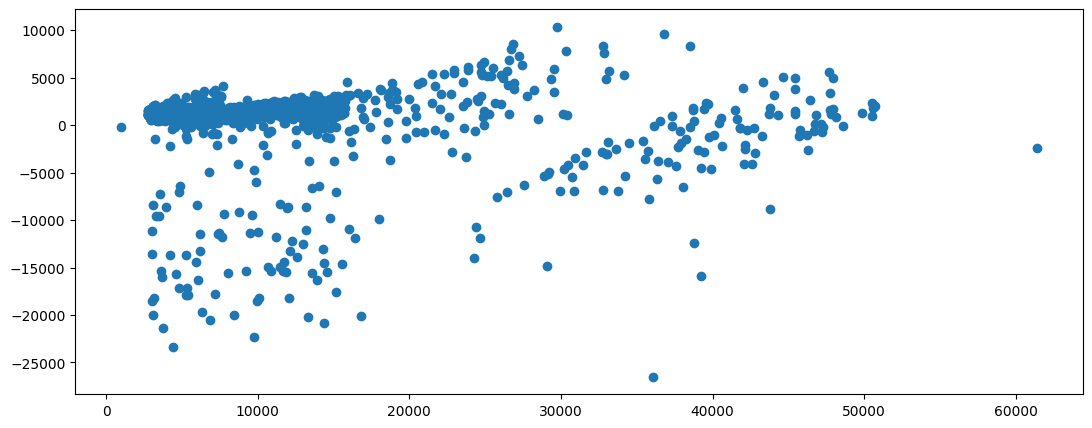

In [73]:
plt.figure(figsize = (13,5))
plt.scatter(pred,pred-train_target)
plt.show()

In [81]:
import matplotlib.pyplot as plt
train_score = [] # 그래프로 표시하기 위해 점수를 저장
test_score = []

In [82]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100] # 알파 값
for alpha in alpha_list:
    # 릿지 모델을 만듬
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련
    ridge.fit(train_scaled, train_target)
    #훈련 점수와 테스트 점수를 리스트에 추가
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

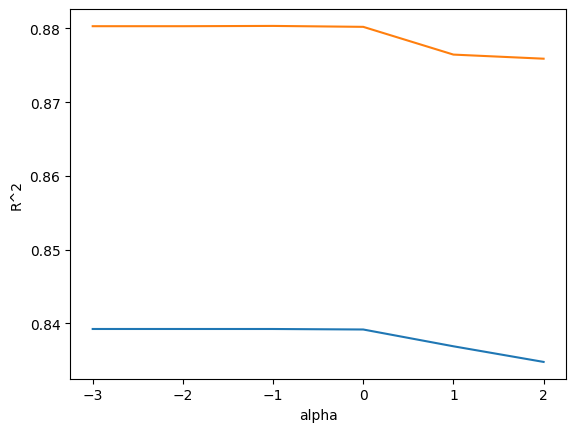

In [25]:
# 그래프로 표현
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [26]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델을 만듬
    lasso = Lasso(alpha=alpha, max_iter = 10000) # max_iter : 지정한 반복횟수를 정해줌
    # 라쏘 모델 훈련
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

C:\Users\KOREAIT\anaconda3\envs\py39tf2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.250e+10, tolerance: 1.538e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\KOREAIT\anaconda3\envs\py39tf2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.250e+10, tolerance: 1.538e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\KOREAIT\anaconda3\envs\py39tf2\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing reg

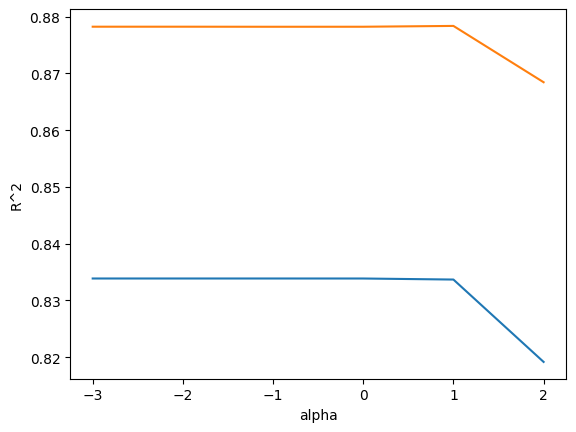

In [27]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show() # 지수가 1일때 즉 알파가 10**1  일때 결과가 가장 좋음 알파값은 1로하자

In [89]:
np.sum(lasso.coef_ == 0)

1